=== Random Forest (Supervised) ===
[[1039    3]
 [ 194  672]]
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      1042
           1       1.00      0.78      0.87       866

    accuracy                           0.90      1908
   macro avg       0.92      0.89      0.89      1908
weighted avg       0.91      0.90      0.89      1908

Accuracy: 89.68 %

=== Isolation Forest (Unsupervised) ===
[[4058 1215]
 [2322 1942]]
              precision    recall  f1-score   support

           0       0.64      0.77      0.70      5273
           1       0.62      0.46      0.52      4264

    accuracy                           0.63      9537
   macro avg       0.63      0.61      0.61      9537
weighted avg       0.63      0.63      0.62      9537

Accuracy: 62.91 %



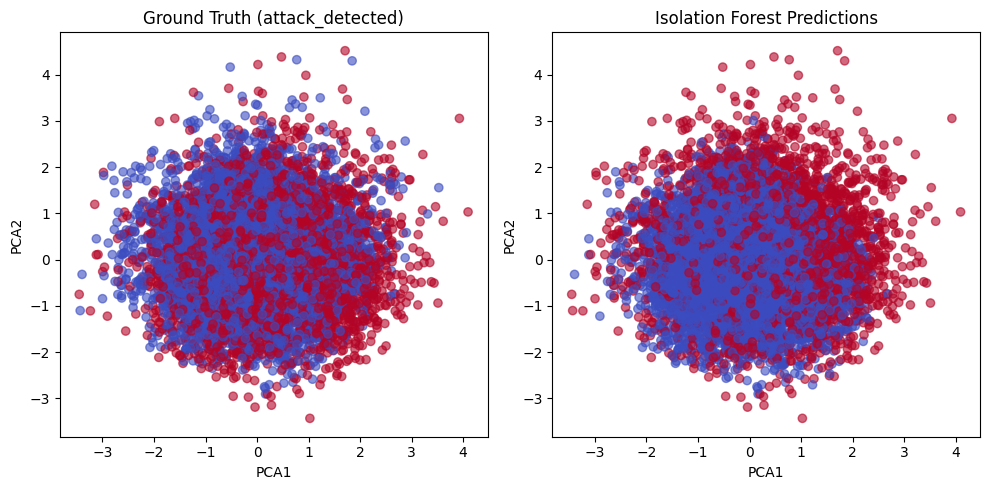

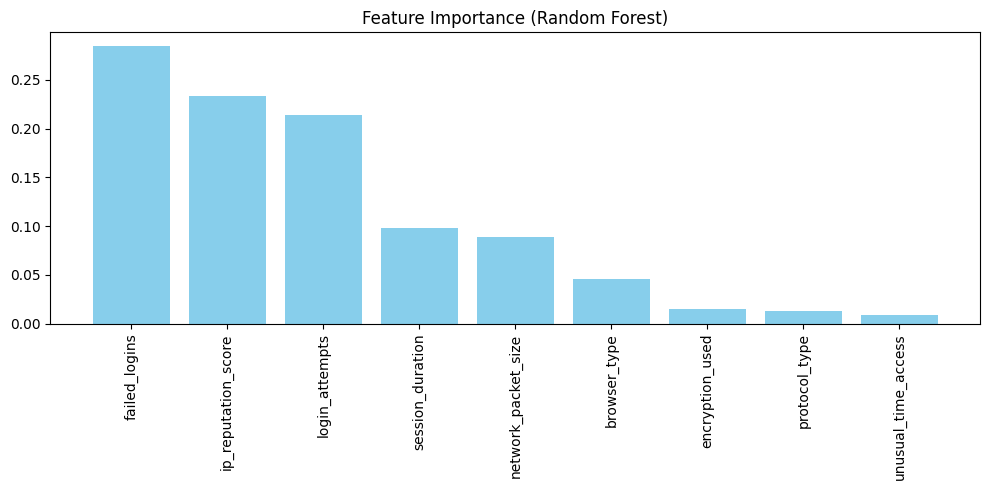

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Step 1: Load data
df = pd.read_csv("/content/cybersecurity_intrusion_data.csv")

# Step 2: Preprocessing
df.drop(columns=['session_id'], inplace=True)
categorical_cols = ['protocol_type', 'browser_type', 'unusual_time_access', 'encryption_used']
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col].astype(str))

X = df.drop(columns=['attack_detected'])
y = df['attack_detected']

# Step 3: Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Step 4: Random Forest
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_rf, y_train_rf)
rf_preds = rf.predict(X_test_rf)

# Step 5: Isolation Forest
iso = IsolationForest(n_estimators=100, contamination='auto', random_state=42)
iso.fit(X_scaled)
iso_preds = iso.predict(X_scaled)
iso_preds = np.where(iso_preds == -1, 1, 0)

# Step 6: Evaluation
print("=== Random Forest (Supervised) ===")
print(confusion_matrix(y_test_rf, rf_preds))
print(classification_report(y_test_rf, rf_preds))
print("Accuracy:", round(accuracy_score(y_test_rf, rf_preds)*100, 2), "%\n")

print("=== Isolation Forest (Unsupervised) ===")
print(confusion_matrix(y, iso_preds))
print(classification_report(y, iso_preds))
print("Accuracy:", round(accuracy_score(y, iso_preds)*100, 2), "%\n")

# ----------------- VISUALIZATIONS -----------------

# PCA Scatter Plot: Ground Truth vs IF
plt.figure(figsize=(10, 5))

# Ground Truth
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', alpha=0.6)
plt.title("Ground Truth (attack_detected)")
plt.xlabel("PCA1")
plt.ylabel("PCA2")

# Isolation Forest Prediction
plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=iso_preds, cmap='coolwarm', alpha=0.6)
plt.title("Isolation Forest Predictions")
plt.xlabel("PCA1")
plt.ylabel("PCA2")

plt.tight_layout()
plt.show()


# Feature Importance: Random Forest
importances = rf.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 5))
plt.title("Feature Importance (Random Forest)")
plt.bar(range(X.shape[1]), importances[indices], align='center', color='skyblue')
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()

